In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

... resuming from 996147200 bytes (146744494 bytes left) ...
100% 1.06G/1.06G [00:06<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:06<00:00, 21.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 90s 121ms/step - loss: 1.3000 - accuracy: 0.6105 - val_loss: 0.7126 - val_accuracy: 0.6228
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6037 - accuracy: 0.6969 - val_loss: 0.7496 - val_accuracy: 0.6198
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5021 - accuracy: 0.7588 - val_loss: 0.6872 - val_accuracy: 0.6840
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4450 - accuracy: 0.7923 - val_loss: 0.4955 - val_accuracy: 0.7696
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3964 - accuracy: 0.8170 - val_loss: 0.6475 - val_accuracy: 0.7168
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3386 - accuracy: 0.8460 - val_loss: 0.5205 - val_accuracy: 0.7708
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2776 - accuracy: 0.8748 - val_loss: 0.5106 - val_ac

In [11]:
# generators
test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels='inferred',
    label_mode = 'int',
    batch_size=128,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [12]:
test_directory = "/content/test"

# Load and preprocess the test dataset

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

40/40 [==============================] - 13s 228ms/step - loss: 279.3428 - accuracy: 0.7160
Test Loss: 279.34283447265625
Test Accuracy: 0.7160000205039978


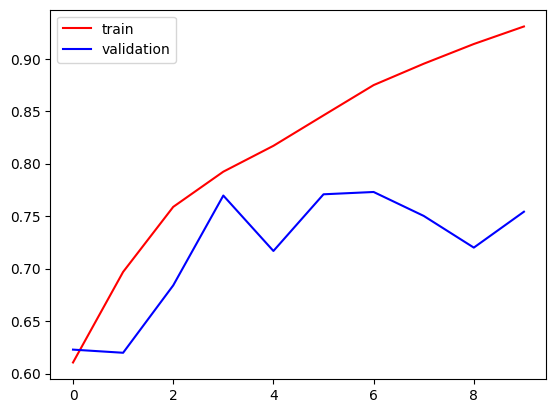

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

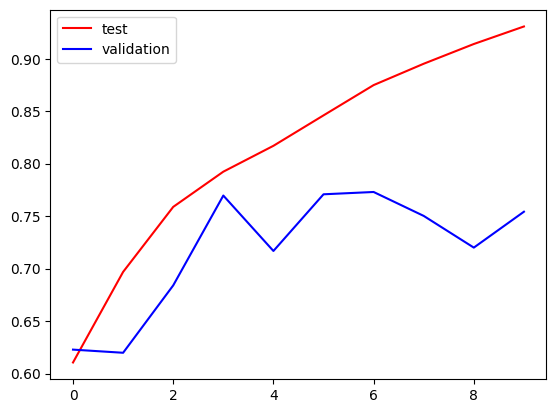

In [14]:
plt.plot(history.history['accuracy'],color='red',label='test')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

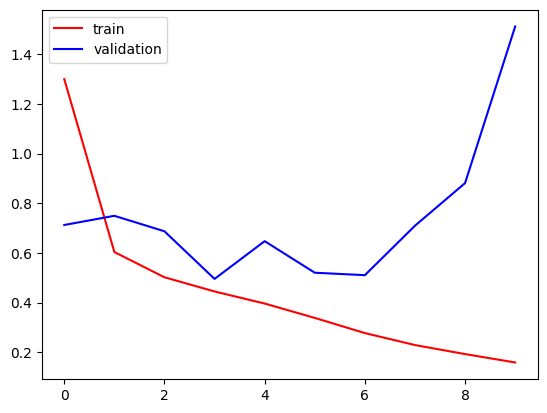

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

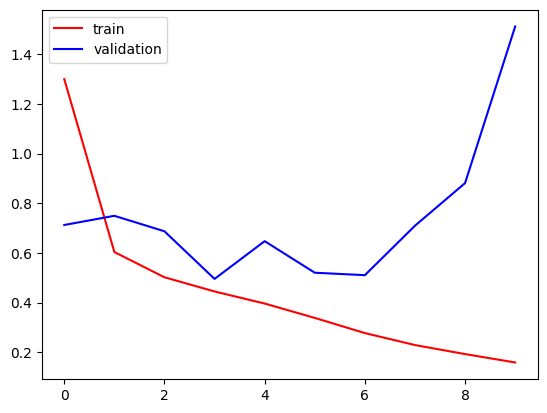

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [18]:
import cv2

In [21]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10007.jpg')

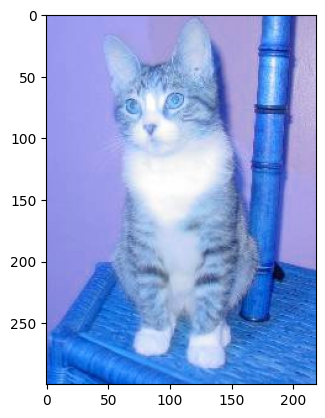

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(300, 219, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 276ms/step


array([[0.]], dtype=float32)

In [28]:
output_array=model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


In [29]:
import numpy as np

disease_labels = ["Cats","Dogs"]

predicted_index = np.argmax(output_array)
predicted_label = disease_labels[predicted_index]

print("Predicted Label:", predicted_label)

Predicted Label: Cats
